In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv'
df = pd.read_csv(url)

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
339,7.32,18.0,1
612,6.14,60.0,1
840,6.89,22.0,1
188,5.92,55.0,1
282,6.43,44.0,1


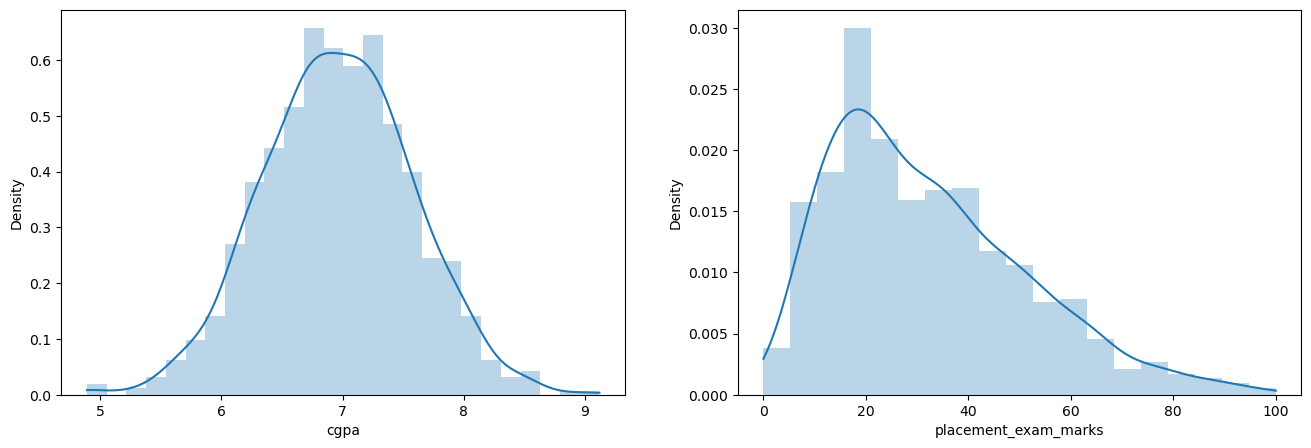

In [4]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True,stat="density",alpha=.3,linewidth = 0)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde = True, stat = 'density',alpha = .3,linewidth = 0)
plt.show()

In [5]:
print("Mean value of cgpa",df['cgpa'].mean())
print("std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [6]:
#finding the boundary values
print('Highest allowed',df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest allowed',df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [7]:
#finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]
#those rows with either cgpa> 8.80 OR cgpa<5.11

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [8]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [9]:
#method 2 - using z-score
df['cgpa_z_score'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [10]:
df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [11]:
df[df['cgpa_z_score'] >3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [12]:
df[df['cgpa_z_score'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [13]:
df[(df['cgpa_z_score'] >3) | (df['cgpa_z_score'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [15]:
new_df = df[(df['cgpa_z_score'] < 3) & (df['cgpa_z_score'] > -3)]

In [16]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [17]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

np(x,y,z) 
x = condition  
y = condition if true 
z = condition if false

In [18]:
lower_limit

np.float64(5.113546374602832)

In [19]:
df['cgpa'] = np.where(df['cgpa'] > upper_limit, 
                      upper_limit,
                      np.where(
                          df['cgpa'] < lower_limit,
                          lower_limit,
                          df['cgpa']
                      ))

In [20]:
df.shape

(1000, 4)

In [21]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64